In [1]:
import numpy as np # numerical python
import pandas as pd # data processing
import matplotlib as plt2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
import seaborn as sns #statistical data visualization
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm 
import pylab as py 



import warnings#ignore warnings
warnings.filterwarnings("ignore")


print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
print("Matplotlib version:",plt2.__version__)
print("Seaborn version:",sns.__version__)

Pandas version: 1.1.3
Numpy version: 1.19.2
Matplotlib version: 3.3.4
Seaborn version: 0.11.0


In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_submission = pd.read_csv("data/gender_submission.csv")
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Cabin"] = train["Cabin"].fillna("G6")
train["Embarked"] = train["Embarked"].fillna("Q")
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [3]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


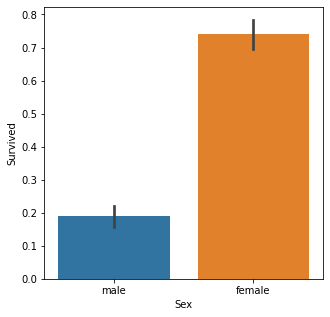

In [4]:
fig = plt.figure(figsize = (5, 5))
sns.barplot(x="Sex", y="Survived", data=train)
fig.savefig("images/survived_vs_sex.png")

resource: https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

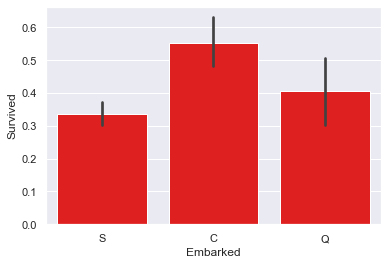

In [5]:
sns.set(style="darkgrid", color_codes=True)


sns.barplot(x="Embarked", y="Survived", data=train,color="red")

# QQPlot


resource: https://www.kaggle.com/nareshbhat/outlier-the-silent-killer

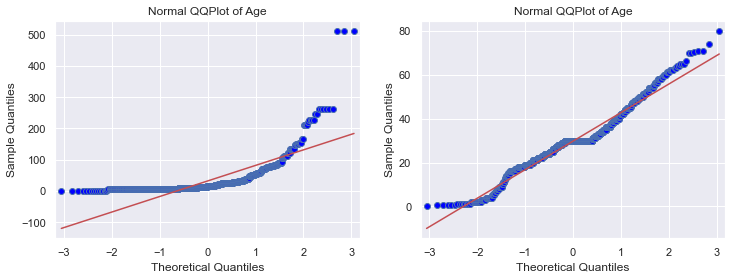

In [6]:
fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sm.qqplot(train["Fare"], line ='s',ax = ax1) 
plt.title("sd")
ax1.set_title("Normal QQPlot of Age")
  
sm.qqplot(train["Age"], line ='s', ax=ax2) 
ax2.set_title("Normal QQPlot of Age")
py.show()

# Box Plot

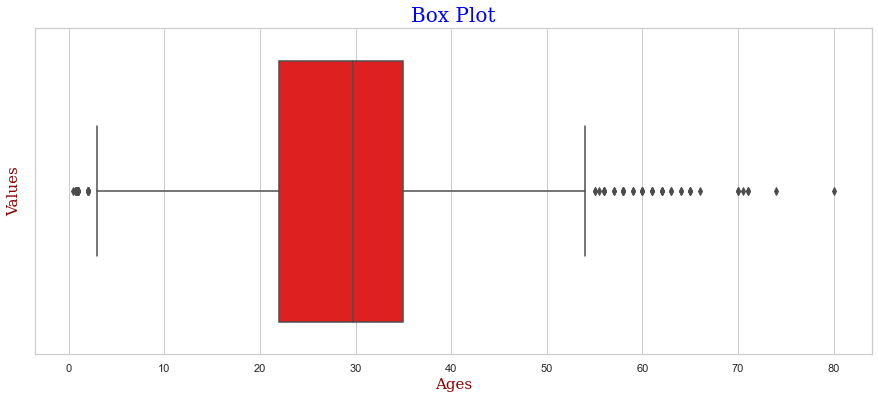

In [7]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
plt.title("Box Plot", fontdict = font1)
a = sns.boxplot(train["Age"], color="red")
plt.xlabel("Ages", fontdict = font2)
plt.ylabel("Values", fontdict = font2)
plt.show()
fig.savefig("images/Values_Ages_boxplot.png")

resource: https://www.kaggle.com/granjithkumar/titanic-data-visualization-a-seaborn-approach

<AxesSubplot:>

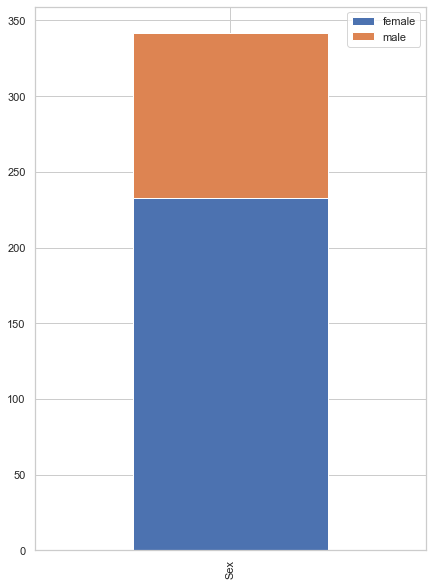

In [8]:
survived = train[train['Survived']==1]["Sex"].value_counts()
df = pd.DataFrame([survived])
df.plot(kind='bar',stacked=True, figsize=(7,10))

3    491
1    216
2    184
Name: Pclass, dtype: int64


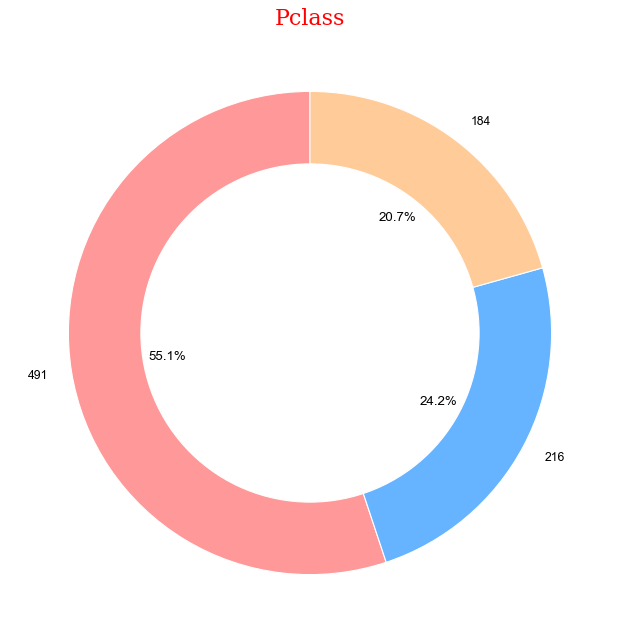

In [23]:
font1 = {'family':'serif','size':20}
df = train['Pclass'].value_counts()

names='3', '1', '2',
size=[491,216,184]
 
fig = plt.figure(figsize=(16, 10), dpi= 80)
fig.patch.set_facecolor('white')
colors = ['#ff9999','#66b3ff','#ffcc99']
plt.rcParams['text.color'] = 'black'
 
my_circle=plt.Circle( (0,0), 0.7, color='white')
 
# Pieplot + circle on it
plt.pie(size,colors=colors, labels=df, autopct='%1.1f%%', startangle=90)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Pclass", font = font1, color="red")
print(train["Pclass"].value_counts())
plt.show()
fig.savefig("images/piechart_pclass.png")

resource: https://www.kaggle.com/claraljm/titanic-data-visualization

# Heatmap

<AxesSubplot:>

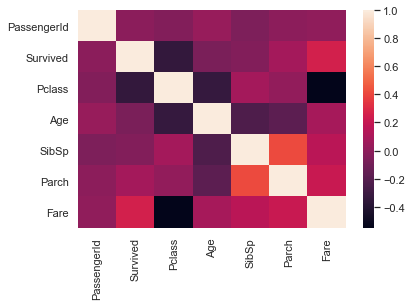

In [10]:
sns.heatmap(train.corr())

resource: https://www.kaggle.com/joshuajhchoi/101-data-visualization-tips-for-titanic-beginners

<AxesSubplot:>

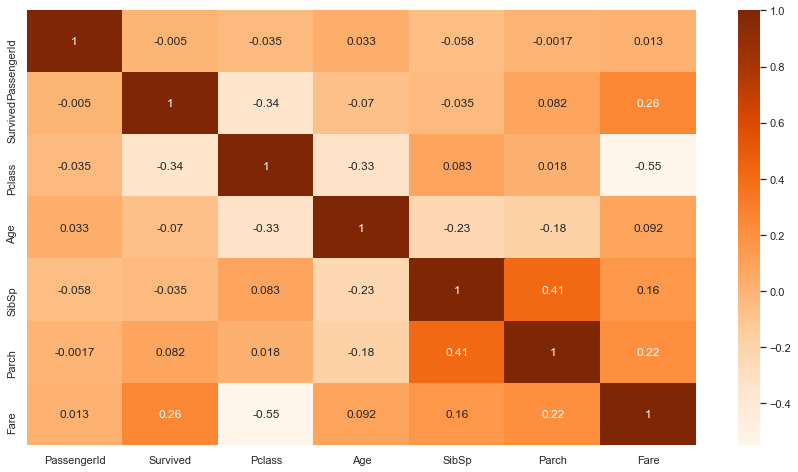

In [16]:
#resource: https://www.kaggle.com/alankritamishra/titaniceasyway2-0
plt.subplots(figsize=(15,8))

sns.heatmap(train.corr(),annot=True,cmap='Oranges')

resource: https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

In [25]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,20 ~ 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30 ~ 40


resource:https://www.kaggle.com/nitindatta/first-kaggle-submission

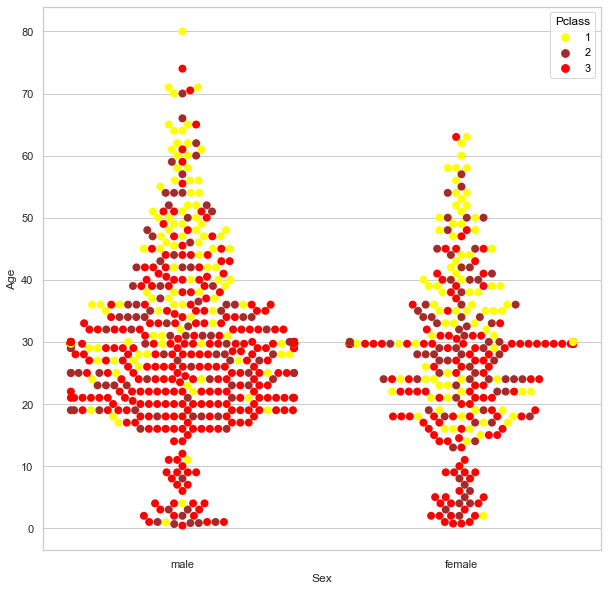

In [24]:
#Clear representation of Ages of passengers and to which Class they belonged
plt.figure(figsize=(10,10))
sns.swarmplot(x="Sex",y="Age",hue='Pclass',data=train,size=8 ,palette=['yellow','brown','red'])
fig.savefig("images/swarmplot_sex_age_pclass.png")

resource: https://www.kaggle.com/subinium/matplotlib-conceptual-figure-basic-viz

resource: https://www.kaggle.com/joshuajhchoi/101-data-visualization-tips-for-titanic-beginners

resource: https://www.kaggle.com/alankritamishra/titaniceasyway2-0

# Day 18
Visualization